**EXPLORING THE DATASET**

In [21]:
import pandas as pd

data = pd.read_csv('/content/traffic_weather_combined_log.csv')

In [22]:
data.head()

,city,latitude,longitude,currentSpeed,freeFlowSpeed,confidence,incidents,weather,congestion,timestamp
0,New York,40.7128,-74.0060,15,27,1.0,no incident,Light rain,Moderate Congestion,5/5/2025 16:50
1,Los Angeles,34.0522,-118.2437,28,28,1.0,no incident,Partly cloudy,Free Flow,5/5/2025 16:50
2,Chicago,41.8781,-87.6298,10,17,1.0,no incident,Overcast,Moderate Congestion,5/5/2025 16:50
3,Houston,29.7604,-95.3698,14,18,1.0,no incident,Partly cloudy,Light Congestion,5/5/2025 16:50
4,Phoenix,33.4484,-112.0740,18,18,1.0,no incident,Partly cloudy,Free Flow,5/5/2025 16:50


Number of cities present in the dataset

In [23]:
data['city'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Boston', 'Las Vegas', 'Milwaukee', 'Nashville', 'Oklahoma City',
       'Louisville', 'Portland', 'Baltimore', 'Albuquerque', 'El Paso',
       'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Charlotte',
       'San Francisco', 'Indianapolis', 'Seattle', 'Denver', 'Washington'],
      dtype=object)

Type of congestion available in our dataset

In [24]:
data['congestion'].unique()

array(['Moderate Congestion', 'Free Flow', 'Light Congestion',
       'Heavy Congestion'], dtype=object)

Checking the distribution of currentSpeed, freeFlowSpeed and Congestion to check how the traffic generally flows

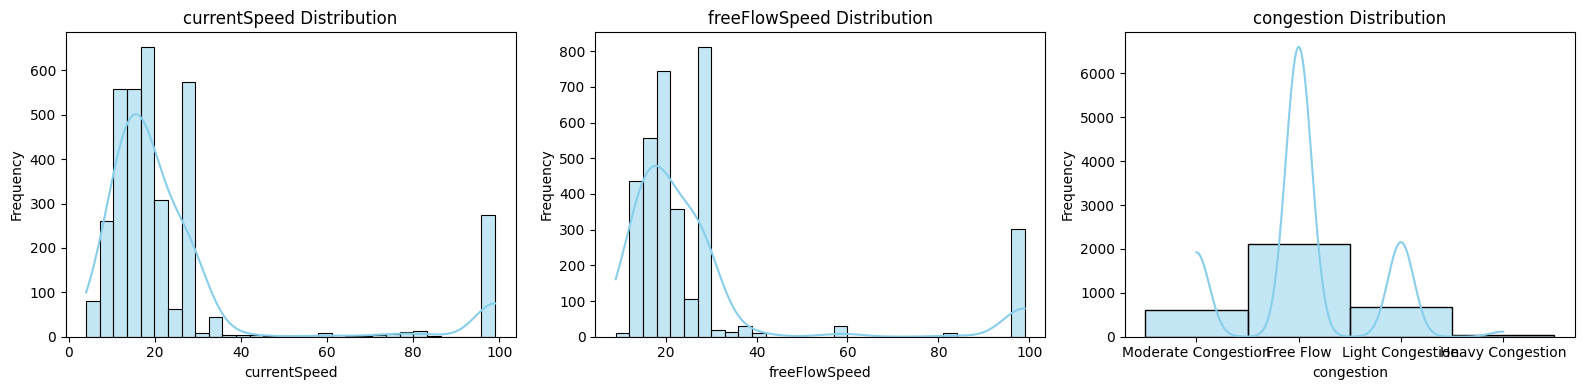

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('traffic_weather_combined_log.csv')

plt.figure(figsize=(16, 4))

for i, col in enumerate(['currentSpeed', 'freeFlowSpeed', 'congestion']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Congestion distrbution shows normal distrbution while currentSpeed and freeFlowSpeed are right skewed

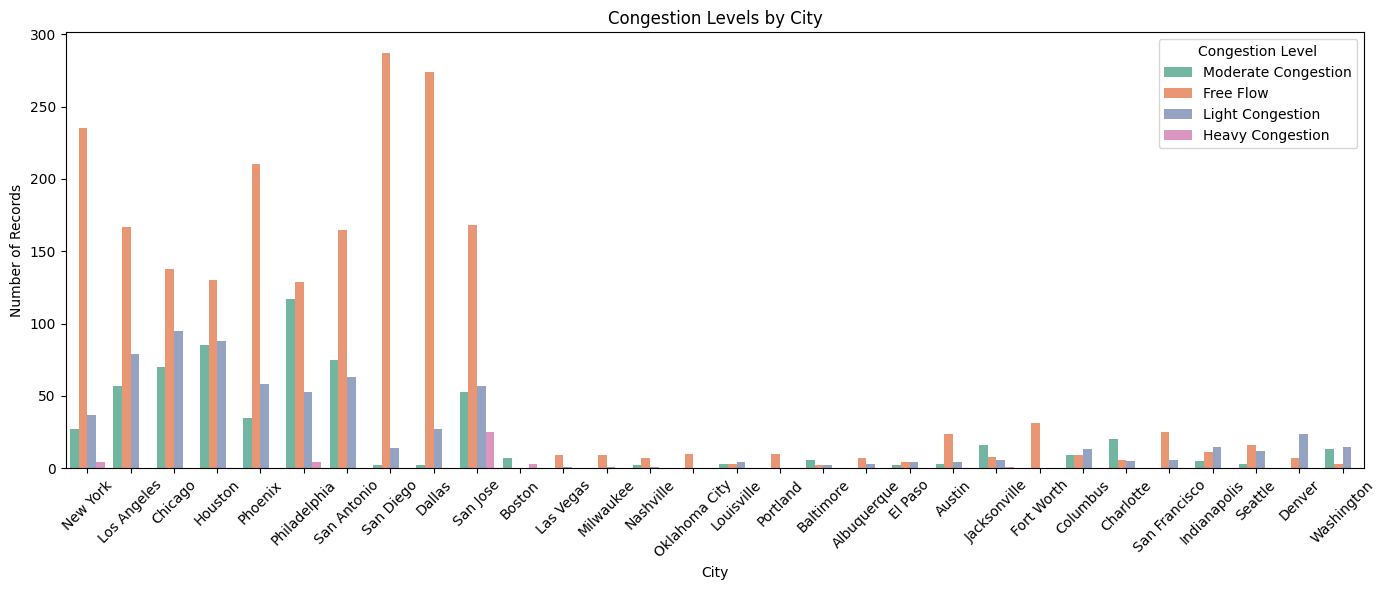

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/traffic_weather_combined_log.csv")

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="city", hue="congestion", palette="Set2")

plt.title("Congestion Levels by City")
plt.xlabel("City")
plt.ylabel("Number of Records")
plt.xticks(rotation=45)
plt.legend(title="Congestion Level")
plt.tight_layout()
plt.show()


Checking how the weather type effects congestion

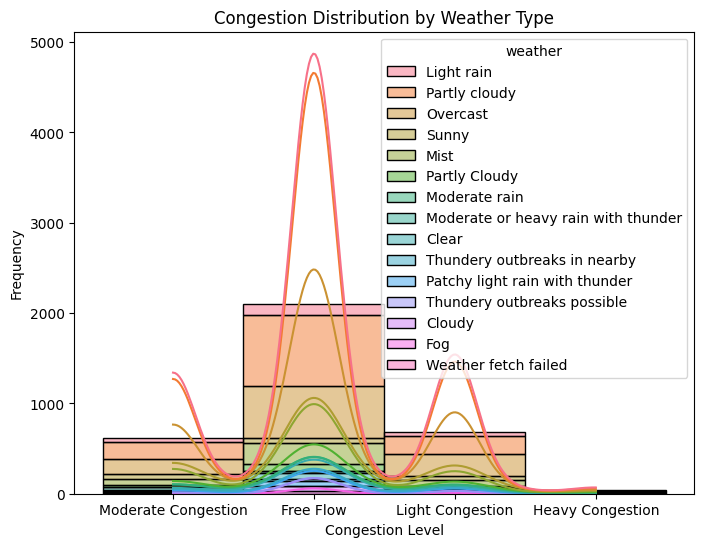

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='congestion', hue='weather', multiple="stack", bins=10, kde=True)

plt.title('Congestion Distribution by Weather Type')
plt.xlabel('Congestion Level')
plt.ylabel('Frequency')

plt.show()

**PREPROCESSING FOR ML MODEL**

Checking for missing values in our dataset

In [28]:
data.isnull().sum()


,0
city,0
latitude,0
longitude,0
currentSpeed,0
freeFlowSpeed,0
confidence,0
incidents,0
weather,0
congestion,0
timestamp,0


Since we used TomTom API for data collection, so it returned us cleaned data

Checking for categorical variable and one-hot encoding them

In [29]:
data['city'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Boston', 'Las Vegas', 'Milwaukee', 'Nashville', 'Oklahoma City',
       'Louisville', 'Portland', 'Baltimore', 'Albuquerque', 'El Paso',
       'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Charlotte',
       'San Francisco', 'Indianapolis', 'Seattle', 'Denver', 'Washington'],
      dtype=object)

In [30]:
data['weather'].unique()

array(['Light rain', 'Partly cloudy', 'Overcast', 'Sunny', 'Mist',
       'Partly Cloudy', 'Moderate rain',
       'Moderate or heavy rain with thunder', 'Clear',
       'Thundery outbreaks in nearby', 'Patchy light rain with thunder',
       'Thundery outbreaks possible', 'Cloudy', 'Fog',
       'Weather fetch failed'], dtype=object)

In [31]:
data = data[data['weather'] != 'Weather fetch failed']

In [32]:
data['congestion'].unique()

array(['Moderate Congestion', 'Free Flow', 'Light Congestion',
       'Heavy Congestion'], dtype=object)

Models cannot interpret datetime object hence converting it into interpretable format


In [33]:

data['timestamp'] = pd.to_datetime(data['timestamp'])
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour

data_encoded = data.drop('timestamp', axis=1)

data_encoded = pd.get_dummies(data_encoded, columns=['city', 'weather', 'incidents'], drop_first=True)

<ipython-input-33-efd77dffc55d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['timestamp'] = pd.to_datetime(data['timestamp'])
<ipython-input-33-efd77dffc55d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['timestamp'].dt.day
<ipython-input-33-efd77dffc55d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Converting True to 1 and False to 0

In [34]:
data_encoded = data_encoded.replace({True: 1, False: 0})

<ipython-input-34-7c222f3f89db>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({True: 1, False: 0})


In [35]:
data_encoded.head()

,latitude,longitude,currentSpeed,freeFlowSpeed,confidence,congestion,day,hour,city_Austin,city_Baltimore,...,weather_Mist,weather_Moderate or heavy rain with thunder,weather_Moderate rain,weather_Overcast,weather_Partly Cloudy,weather_Partly cloudy,weather_Patchy light rain with thunder,weather_Sunny,weather_Thundery outbreaks in nearby,weather_Thundery outbreaks possible
0,40.7128,-74.0060,15,27,1.0,Moderate Congestion,5,16,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0522,-118.2437,28,28,1.0,Free Flow,5,16,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41.8781,-87.6298,10,17,1.0,Moderate Congestion,5,16,0,0,...,0,0,0,1,0,0,0,0,0,0
3,29.7604,-95.3698,14,18,1.0,Light Congestion,5,16,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33.4484,-112.0740,18,18,1.0,Free Flow,5,16,0,0,...,0,0,0,0,0,1,0,0,0,0


Train Test Split


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le_congestion = LabelEncoder()
y = le_congestion.fit_transform(data_encoded['congestion'])


X = data_encoded.drop('congestion', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


Finding Best Parameters for the model using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=2)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'n_estimators': 300}



Fitting the model using the best parameters

In [39]:
model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    n_estimators=300,
    random_state=2
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Classification Report

In [40]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       428
           1       0.75      1.00      0.86         3
           2       0.96      0.93      0.95       132
           3       0.92      0.96      0.94       125

    accuracy                           0.98       688
   macro avg       0.91      0.97      0.94       688
weighted avg       0.98      0.98      0.98       688



Saving the model using joblib so that we can use in our TrafficPredictionApp

In [41]:
import joblib


joblib.dump(model, 'random_forest_traffic_model.pkl')

joblib.dump(X_train.columns.tolist(), 'random_forest_feature_columns.pkl')

joblib.dump(le_congestion, 'congestion_encoder.pkl')

['congestion_encoder.pkl']